#### Qa Implement the Accuracy function and test it on the MNIST data.
The task is to implement an accuracy function on the form `MyAccuracy(y_true, y_pred)`, test it and compare it with the Scikit-learn `sklearn.metrics.accuracy_score()`.

In [1]:
#MNIST DATA LOADER IMPLEMENTED
from sklearn.datasets import fetch_openml #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
import numpy as np
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784',return_X_y=True) 
    #Bemærk, ingen normalisering! 
    return X, y

X,y = MNIST_GetDataSet()
#Converting to integer type, as it's string from source.
y = y.astype(np.uint8)

In [2]:
# TODO: Qa...
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# Load data from https://www.openml.org/d/554
# Convert to [0;1] via scaling (not always needed)
#X = X / 255.

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#Calculating the TP, FP, FN and TN values with the function MyConfusion
def MyConfusion(y_true, y_pred):
    try:
        a,b = np.shape(y_pred)
        if b: 
            y_pred = y_pred.flatten()
    except: 
        #Pass here as we do not want the printed message a lot of times in the following, although good to have. 
        pass #print("Exception caught: y_pred, already 1D array")
    #Checks if the y_pred is multidimensional - if so, flattens it. 

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i] == 1:
            TP += 1
        if y_pred[i] == 1 and y_true[i] == 0:
            FP += 1
        if y_pred[i] == 0 and y_true[i] == 1:
            FN += 1
        if y_pred[i] == y_true[i] == 0:
            TN += 1
    return TP, FP, FN, TN

#Defining MyAccuracy using the MyConfusion function. 
def MyAccuracy(y_true, y_pred):
    TP, FP, FN, TN = MyConfusion(y_true, y_pred)
    acc = (TP + TN)/(TP+TN+FP+FN)
    return acc
    
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred) #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

    print(f"my a          ={a0}")
    print(f"scikit-learn a={a1}")

    # do some numerical comparison here, like
    #  if fabs(a0-a1)<eps then ..
    

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Separating in train and test
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

#Using Dummy_classifier
Not_5 = DummyClassifier()
Not_5.fit(X_train, y_train_5)
y_pred_dum = Not_5.predict(X_test)

#Using SGD_classifier
#SGD_Classifyer
sgd_clf = SGDClassifier(random_state=42) #The SGDClassifier relies on randomness during training (hence the name “stochastic”).
#If you want reproducible results, you should set the random_state parameter
#Training the model
sgd_clf.fit(X_train, y_train_5)
#Making predictions
y_pred_SGD = sgd_clf.predict(X_test)
            
print("Accuracy with Dummy_Classifier")
print(MyAccuracy(y_test_5, y_pred_dum))
print("\nTestAccuracy with Dummy_Classifier")
TestAccuracy(y_test_5, y_pred_dum)


print("\nAccuracy with SGD_Classifier")
print(MyAccuracy(y_test_5, y_pred_SGD))
print("\nTestAccuracy with SGD_Classifier")
TestAccuracy(y_test_5, y_pred_SGD)

Accuracy with Dummy_Classifier
0.9108

TestAccuracy with Dummy_Classifier
my a          =0.9108
scikit-learn a=0.9108

Accuracy with SGD_Classifier
0.9492

TestAccuracy with SGD_Classifier
my a          =0.9492
scikit-learn a=0.9492


The accuracies are equal, indicating correct implementation of MyAccuracy. Notice that MyConfusion is not an attempt to define the confusion matrix, as this follows in the coming exercises. 

#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models
The task is to implement `MyPrecision`, `MyRecall` and `MyF1Score` functions on the MNIST dataset. The functions are to be called for the predicted values of the Dummy and SGD classifier. It's pointed out, that the test-data was created in the previous task. To adress the denominator issue, it's chosen to analyse it, and return "infinity" as a placeholder if 0, which of course is to be replaced by what ever is appropriate.

In [3]:
#The Confusion matrix in value form

#Redefining as I got smarter
def MyAccuracy(y_true, y_pred):
    TP, FP, FN, TN = MyConfusion(y_true, y_pred)
    if TP+TN+FP+FN == 0:
        return 0
    elif TP != 0 or FN != 0 or TN!=0 or FP!=0:
        acc = (TP + TN)/(TP+TN+FP+FN) 
        return acc
    

def MyPrecision(y_true, y_pred):
    TP, FP, FN, TN = MyConfusion(y_true, y_pred)
    prec = 0
    if TP+FN == 0:
        prec = "Infinity"
    elif TP != 0 or FP != 0:
        prec = TP/(TP+FP) #Returns zero for dummyClassifier as we have no positives at all.    
        
    return prec

def MyRecall(y_true, y_pred):
    TP, FP, FN, TN = MyConfusion(y_true, y_pred)
    rec = 0
    if TP+FN == 0:
        rec = "Infinity"
    elif TP != 0 or FN != 0:
        rec = TP/(TP+FN) #Returns zero for dummyClassifier as we have no positives at all.
        
    return rec
    
def MyF1Score(y_true, y_pred):
    TP, FP, FN, TN = MyConfusion(y_true, y_pred)
    prec = MyPrecision(y_true, y_pred)
    rec = MyRecall(y_true, y_pred)
    
    F1 = 0
    if prec+rec == 0:
        F1 = "Infinity"
    elif TP != 0 or FN != 0:
        F1 = (2*prec*rec)/(prec+rec) #Returns zero for dummyClassifier as we have no positives at all.

    
print("Accuracy for Dummy Classifier")
acc = MyAccuracy(y_test_5, y_pred_dum)
print(acc)

print("Precision for Dummy Classifier")
prec = MyPrecision(y_test_5, y_pred_dum)
print(prec)

print("Recall for Dummy Classifier")
rec = MyRecall(y_test_5, y_pred_dum)
print(rec)

print("F1Score for Dummy Classifier")
f1 = MyRecall(y_test_5, y_pred_dum)
print(f1)



print("\nAccuracy for SGD_Classifier")
acc = MyAccuracy(y_test_5, y_pred_SGD)
print(acc)

print("Precision for SGD_Classifier")
prec = MyPrecision(y_test_5, y_pred_SGD)
print(prec)

print("Recall for SGD_Classifier")
rec = MyRecall(y_test_5, y_pred_SGD)
print(rec)

print("F1Score for SGD_Classifier")
f1 = MyRecall(y_test_5, y_pred_SGD)
print(f1)

Accuracy for Dummy Classifier
0.9108
Precision for Dummy Classifier
0
Recall for Dummy Classifier
0.0
F1Score for Dummy Classifier
0.0

Accuracy for SGD_Classifier
0.9492
Precision for SGD_Classifier
0.6618887015177066
Recall for SGD_Classifier
0.8800448430493274
F1Score for SGD_Classifier
0.8800448430493274


#### Qc The Confusion Matrix
On what form is the Scikit-learn confusion matrix? 
$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{|l|l|l|}}
\def\ea{\end{array}}
$$

Scikit-learns confusion matrix is organized in a format for the confusion matrix on the form of: 
$$ 
\ba
\hline
 TN & FN \\\hline
 FP & TP \\\hline
\ea
$$

Furthermore, generate the confusion matrix for the dummy and SGD classifiers. 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [4]:
from sklearn import * #Aware that this is an inefficient import. 

def MyConfusionMatrix(y_true, y_pred):
    TP, FP, FN, TN = MyConfusion(y_true, y_pred)
    myConfusionMatrix = np.array([[TP, FP], [FN, TN]])    #By definition of Wikipedia https://en.wikipedia.org/wiki/Confusion_matrix
    
    return myConfusionMatrix
    

print("For the Dummy Classifier")
ConfM_dum = metrics.confusion_matrix(y_test_5,y_pred_dum)
print("Confusion Matrix defined by Scikit-learn")
print(ConfM_dum)

print("\nFor the SGD Classifier")
ConfM_SGD = metrics.confusion_matrix(y_test_5,y_pred_SGD)
print("Confusion Matrix defined by Scikit-learn")
print(ConfM_SGD)

#Not needed for the exercise. 
#MyConfM = MyConfusionMatrix(y_test_5, y_pred)
#print("Confusion Matrix defined by Wikipedia")
#print(MyConfM)

#Wrong call
ConfW= metrics.confusion_matrix(y_pred_dum,y_test_5)
print("\nCalling the test and predicted vectors in wrong order")
print(ConfW)

For the Dummy Classifier
Confusion Matrix defined by Scikit-learn
[[9108    0]
 [ 892    0]]

For the SGD Classifier
Confusion Matrix defined by Scikit-learn
[[8707  401]
 [ 107  785]]

Calling the test and predicted vectors in wrong order
[[9108  892]
 [   0    0]]


It's evident that if the call is messed up and the data are switched, we see that the TP and TN are switched, and the FP and FN are switched with respect to the Wikipedia definition. With respect to Scikit-learns definition only the FN and FP are switched. 

#### Qd A Confusion Matrix Heat-map
The task is to generate a heat map of the two confusion matricies, named `M_dummy = ConfM_dum` and same goes for SGD, generated from the Dummy and the SGD-classifier. 
This is solved using the matplotlib function matshow, as shown below. 

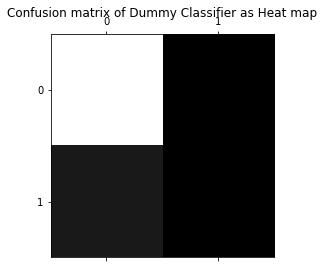

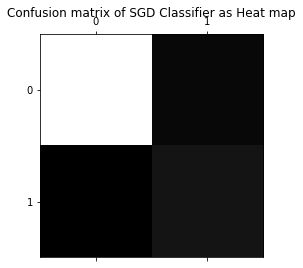

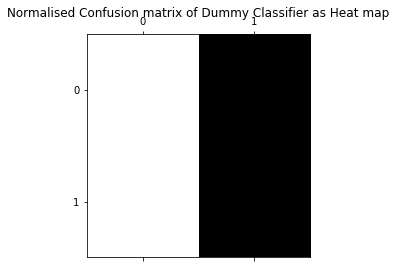

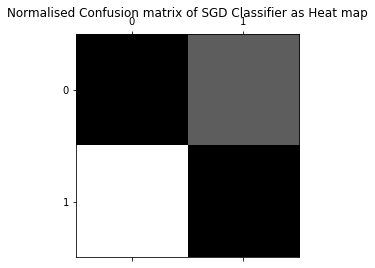

In [7]:
import matplotlib.pyplot as plt

#Plotting
plt.matshow(ConfM_dum, cmap=plt.cm.gray) 
plt.title("Confusion matrix of Dummy Classifier as Heat map")
plt.show()

plt.matshow(ConfM_SGD, cmap=plt.cm.gray)
plt.title("Confusion matrix of SGD Classifier as Heat map")
plt.show()


#Calculating the number of 
row_number_vals_dum = ConfM_dum.sum(axis=1, keepdims=True)
normConfM_dum = ConfM_dum / row_number_vals_dum

row_number_vals_SGD = ConfM_SGD.sum(axis=1, keepdims=True)
normConfM_SGD = ConfM_SGD / row_number_vals_SGD

#Removing the diagonal values, so to better analyse the off-diagonal error
np.fill_diagonal(ConfM_dum, 0)
np.fill_diagonal(normConfM_SGD, 0)

#Plotting normlised versions
plt.matshow(normConfM_dum, cmap=plt.cm.gray) 
plt.title("Normalised Confusion matrix of Dummy Classifier as Heat map")
plt.show()

plt.matshow(normConfM_SGD, cmap=plt.cm.gray)
plt.title("Normalised Confusion matrix of SGD Classifier as Heat map")
plt.show()



#Not needed for Exercise
#plt.matshow(ConfM, cmap=plt.cm.gray)
#plt.title("Confusion matrix defined by Wiki as Heat map")
#plt.show()

In the heat maps it's evident that there is a marginally better performance of the SGD Classifier, as the diagonal is of a marginally brighter colour, especially True Positives.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow#matplotlib.pyplot.matshow

### Qe Conclusion
To extract the essence of the above exercises, it's strictly needed to look into the performance metrics, which we are extracting. The performance metrics tell us a lot of interesting information. For example it's clear to see that the dummy-classifier reaches an accuracy of whopping 91.08%, but it's quickly seen from the precision (the precision of the true predictions) and recall (the ratio of true positives to all the predictions), that it's misleading to believe the accuracy only. Of course not forgetting the F1 score, which combines the precision and recall to create a metric which is only high with high precision and recall. Furthermore we're working with the confusion matrix, in which the True positives, True negatives and their false counterparts are arranged. From the Confusion matrix all the previously mentioned metrics can be extracted, which also can be visualised in which we're generally interested in the diagonal being lit up, indicating that most of the data is predicted correctly with TP and TN. 